In [1]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx



In [ ]:

#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
fly_nums = list(range(1389,1402))



multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df



Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [ ]:
flylist = [flb.NetFly(fn) for fn in range(1389,1402)]
[fly.open_signals() for fly in flylist]

In [7]:
multi_fly_df['l_plus_r'] = multi_fly_df['left_amp'] + multi_fly_df['right_amp']
all_stim_df = multi_fly_df


In [6]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right' 'l_plus_r']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0

In [8]:

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [12]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']


In [13]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [14]:
turn_left.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
4291,85.821814,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.259057,1.113822,0.854764,1389,196.5,condition=baseline,2.353217,1.847417,...,0.0,8.638967,3.367114,31.649204,5.551908,0.609672,10.314173,1.345080,2.325033,1.968586
4292,85.841815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936,NaN
4293,85.861815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936,NaN
4294,85.881816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.5,condition=baseline,2.324724,1.847873,...,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296,2.001799
4295,85.901816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.0,condition=baseline,2.324724,1.847873,...,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296,2.001799


In [15]:
##### for the WSA/ kinemcatics column

In [16]:
y = turn_left.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

150

In [17]:
new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

In [18]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds[counter-1]: trial_ind] = counter
    counter += 1

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/pandas/core/series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/home/imag

In [ ]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

In [19]:
#d = pd.DataFrame()
main_df = pd.DataFrame()
dfe= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_left.loc[(turn_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df[counter] = ee
        if len(ee) >= 450:
            main_df[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]



In [20]:
main_df.head()

,0,2,4,6,8,10,12,14,16,18,...,130,132,134,136,138,140,142,144,146,148
0,0.259057,NaN,-0.139492,0.365337,0.199275,0.431762,0.179347,0.146135,0.146135,NaN,...,-0.241025,0.284286,-0.055621,0.241025,-0.067981,0.296646,0.333727,0.185404,-0.309007,NaN
1,NaN,NaN,-0.139492,0.338767,0.199275,0.478260,0.179347,0.159420,0.172705,NaN,...,-0.234845,0.333727,-0.012360,0.234845,-0.061801,0.296646,0.364628,0.197764,-0.364628,NaN
2,NaN,NaN,-0.132850,0.338767,0.146135,0.531400,0.179347,0.205917,0.132850,0.371980,...,-0.234845,0.333727,-0.030901,0.222485,-0.067981,0.259566,0.346088,0.197764,-0.364628,NaN
3,0.225845,NaN,-0.132850,0.332125,0.073067,0.531400,0.179347,0.205917,0.172705,NaN,...,-0.265746,0.290466,0.006180,0.216305,-0.061801,0.309007,0.346088,0.197764,-0.376988,NaN
4,0.225845,NaN,-0.146135,0.332125,0.092995,0.604467,NaN,0.159420,0.059782,0.411835,...,-0.265746,0.278106,0.037081,0.216305,-0.030901,0.309007,0.346088,0.197764,-0.376988,NaN


In [23]:
from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA = np.mean(main_df, axis =1)  #mean
#error = main_df.stack().std()  
error = main_df.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

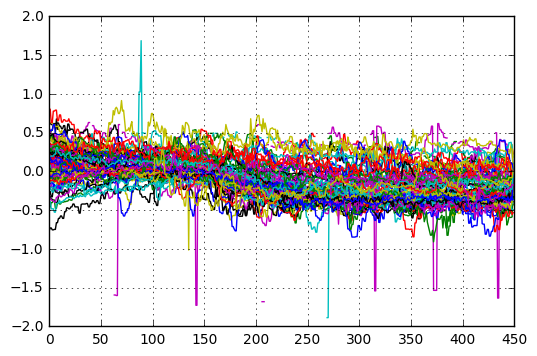

In [24]:
len(mean_WBA)

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [25]:
y2 = turn_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
turn_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_right['trial'][0:trial_ind] = counter
    else: 
        turn_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_turn_right = pd.DataFrame()
dfe_turn_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_right.loc[(turn_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_turn_right[counter] = ee
        if len(ee) >= 450:
            main_df_turn_right[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_turn_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_turn_right = np.mean(main_df_turn_right, axis =1)  #mean
#error = main_df.stack().std()  
error_turn_right = main_df_turn_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
y2 = WSA_increase.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
WSA_increase['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        WSA_increase['trial'][0:trial_ind] = counter
    else: 
        WSA_increase['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = WSA_increase.loc[(WSA_increase['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_up[counter] = ee
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_WSA_increase = np.mean(main_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_WSA_increase = main_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
y2 = WSA_decrease.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
WSA_decrease['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        WSA_decrease['trial'][0:trial_ind] = counter
    else: 
        WSA_decrease['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = WSA_decrease.loc[(WSA_decrease['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_down[counter] = ee
        if len(ee) >= 450:
            main_df_pitch_down[counter] = ee[0:450]    
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_WSA_decrease = np.mean(main_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_WSA_decrease = main_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
def rad_to_deg (rad):
    r_deg = np.rad2deg((rad)/10 *2*np.pi)
    return r_deg

In [34]:
time =inds/50.

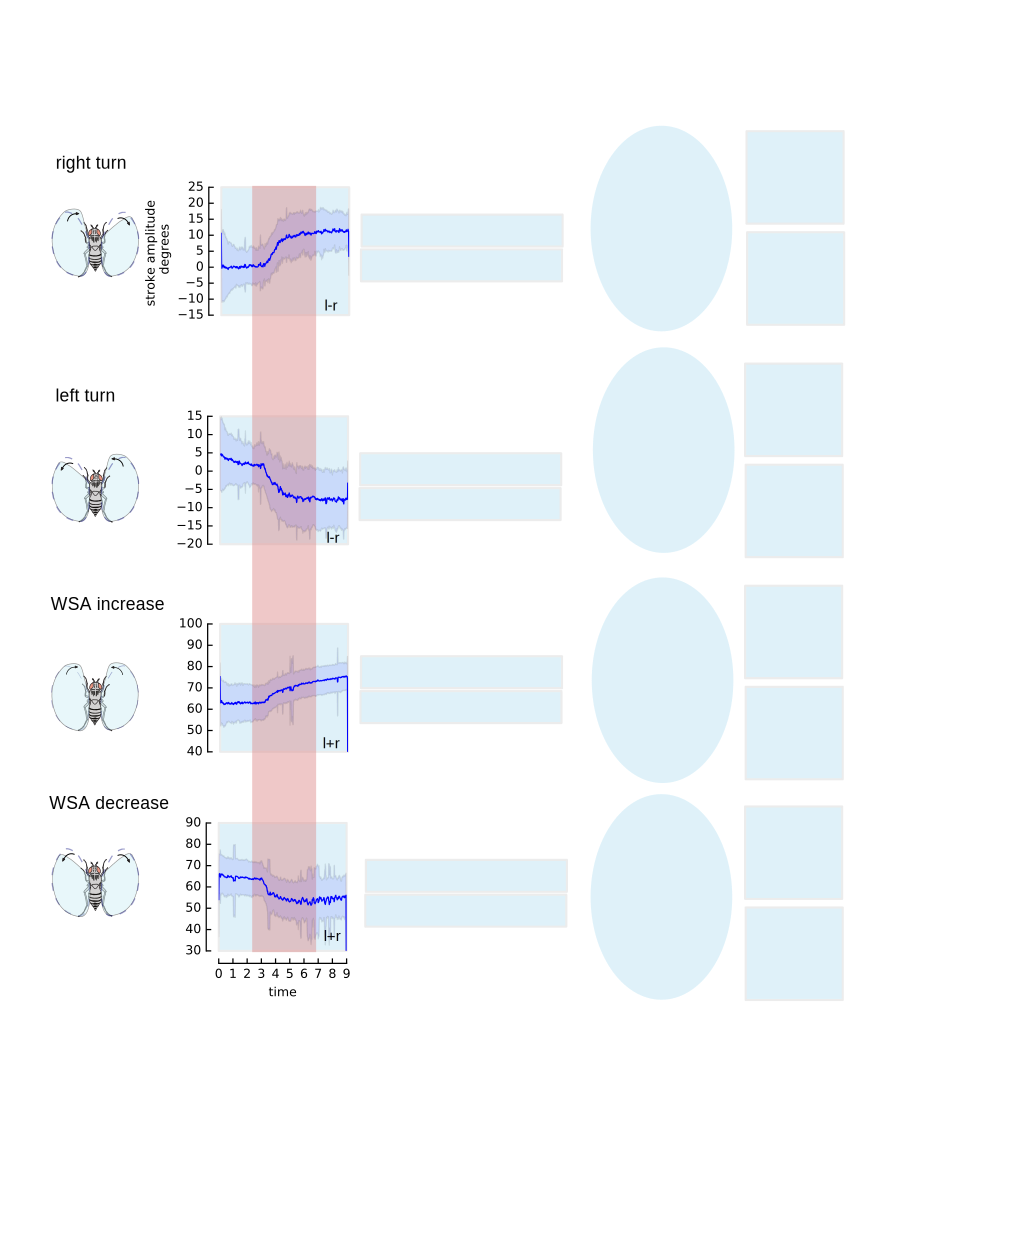

In [62]:



layout = fifi.FigureLayout('paper_figure_2_v3.svg',make_mplfigures = True)

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA)) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)),alpha = 0.1)
layout.axes['l_turn_lmr'].set_ybound(-20, 15)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_turn_right)) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_turn_right-error_turn_right)), rad_to_deg(mean_WBA_turn_right + error_turn_right),alpha = 0.1)
layout.axes['r_turn_lmr'].set_ybound(-15, 25)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')


layout.axes['WSA_dec_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_increase)) #,'o',alpha = 0.2)
layout.axes['WSA_dec_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_increase-error_WSA_increase), rad_to_deg(mean_WBA_WSA_increase + error_WSA_increase),alpha = 0.1)
layout.axes['WSA_dec_lpr'].set_ybound(30, 90)
layout.axes['WSA_dec_lpr'].set_xlabel('time')

layout.axes['WSA_inc_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_decrease)) #,'o',alpha = 0.2)
layout.axes['WSA_inc_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_decrease-error_WSA_decrease), rad_to_deg(mean_WBA_WSA_decrease + error_WSA_decrease),alpha = 0.1)
layout.axes['WSA_inc_lpr'].set_ybound(40, 100)



fifi.mpl_functions.set_spines(layout)
layout.save('figure_2.svg')
plt.close('all')
display(SVG('figure_2.svg'))